In [4]:
from keras.applications import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.densenet import densenet

from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras.callbacks import TensorBoard
import os.path
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
import keras
image_size = 227

#Load the VGG model
vgg_conv = keras.applications.DenseNet201(weights='imagenet', include_top=False, input_shape=(image_size, image_size, 3))

In [5]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

(<keras.engine.input_layer.InputLayer object at 0x7fe20d832710>, False)
(<keras.layers.convolutional.ZeroPadding2D object at 0x7fe20d887f10>, False)
(<keras.layers.convolutional.Conv2D object at 0x7fe20d832750>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7fe20d810190>, False)
(<keras.layers.core.Activation object at 0x7fe20d810590>, False)
(<keras.layers.convolutional.ZeroPadding2D object at 0x7fe20d752ed0>, False)
(<keras.layers.pooling.MaxPooling2D object at 0x7fe20d832950>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7fe20d832890>, False)
(<keras.layers.core.Activation object at 0x7fe20d832e90>, False)
(<keras.layers.convolutional.Conv2D object at 0x7fe20d718610>, False)
(<keras.layers.normalization.BatchNormalization object at 0x7fe20d720790>, False)
(<keras.layers.core.Activation object at 0x7fe20d6d0c50>, False)
(<keras.layers.convolutional.Conv2D object at 0x7fe20d691b90>, False)
(<keras.layers.merge.Concatenate object at 0x7fe20d63

In [6]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(21, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 7, 7, 1920)        18321984  
_________________________________________________________________
flatten_1 (Flatten)          (None, 94080)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              96338944  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 21)                21525     
Total params: 114,682,453
Trainable params: 96,401,173
Non-trainable params: 18,281,280
_________________________________________________________________


In [7]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10

#train path
train_dir = "/home/ozgu/Desktop/DATASETS/UCMerced_LandUse/Images"
#validation path
validation_dir = "/home/ozgu/Desktop/DATASETS/UCMerced_LandUse/"
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(image_size, image_size),
        batch_size=train_batchsize,
        class_mode='categorical')
"""
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(image_size, image_size),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
""" 


Found 2100 images belonging to 21 classes.


"\nvalidation_generator = validation_datagen.flow_from_directory(\n        validation_dir,\n        target_size=(image_size, image_size),\n        batch_size=val_batchsize,\n        class_mode='categorical',\n        shuffle=False)\n"

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=50,
      #validation_data=validation_generator,
      #validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('densenet_25.03.h5')
model.summary()


Epoch 1/50
21/21 [==============================] - 16s 782ms/step - loss: 10.5758 - acc: 0.1948
Epoch 2/50
21/21 [==============================] - 14s 672ms/step - loss: 4.4549 - acc: 0.5152
Epoch 3/50
21/21 [==============================] - 14s 643ms/step - loss: 1.2564 - acc: 0.7143
Epoch 4/50
21/21 [==============================] - 14s 646ms/step - loss: 0.8273 - acc: 0.7781
Epoch 5/50
21/21 [==============================] - 13s 640ms/step - loss: 0.6657 - acc: 0.8205
Epoch 6/50
21/21 [==============================] - 13s 643ms/step - loss: 0.5341 - acc: 0.8505
Epoch 7/50
21/21 [==============================] - 13s 641ms/step - loss: 0.3872 - acc: 0.8857
Epoch 8/50
21/21 [==============================] - 13s 634ms/step - loss: 0.3868 - acc: 0.8795
Epoch 9/50
21/21 [==============================] - 13s 634ms/step - loss: 0.3300 - acc: 0.9105
Epoch 10/50
21/21 [==============================] - 13s 642ms/step - loss: 0.3899 - acc: 0.8890
Epoch 11/50
21/21 [===================

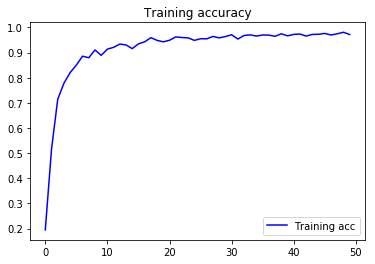

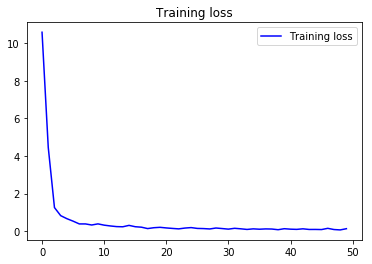

In [10]:
import matplotlib.pyplot as plt

acc = history.history['acc']

loss = history.history['loss']

 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')

plt.title('Training accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')

plt.title('Training loss')
plt.legend()
 
plt.show()

In [11]:
extractLayerName = "dropout_1"

model_new = Model(inputs=model.input, outputs=model.get_layer(extractLayerName).output)

In [12]:
import glob
import numpy as np
from keras.applications.resnet50 import preprocess_input, decode_predictions

#feature extraction steps
feature_list = [] 
feature_list = glob.glob("/home/ozgu/Desktop/DATASETS/aid_all/*.jpg")
print(feature_list[0])
print(len(feature_list))
img_path = '/home/ozgu/Desktop/DATASETS/AID/Airport/airport_1.jpg'
for i in range(len(feature_list)):
    img_path = feature_list[i] 
    #print(i)
    img = image.load_img(img_path, target_size=(227, 227))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)

    preds = model_new.predict(x)
    np.savetxt(feature_list[i] + ".txt",preds)

print("Done...")

/home/ozgu/Desktop/DATASETS/aid_all/airport_302.jpg
10000
Done...
